<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Comparing--Deep-Learning-APIs-for-Image-Multi-Label-Classification" data-toc-modified-id="Comparing--Deep-Learning-APIs-for-Image-Multi-Label-Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Comparing  Deep Learning APIs for Image Multi-Label Classification</a></span><ul class="toc-item"><li><span><a href="#Inception-V3" data-toc-modified-id="Inception-V3-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Inception V3</a></span></li></ul></li></ul></div>

# Computer Vision

In [1]:
# Libraries 
import numpy as np
import tensorflow as tf
import os
from IPython.display import Image, display

##  Comparing  Deep Learning APIs for Image Multi-Label Classification

### Inception V3

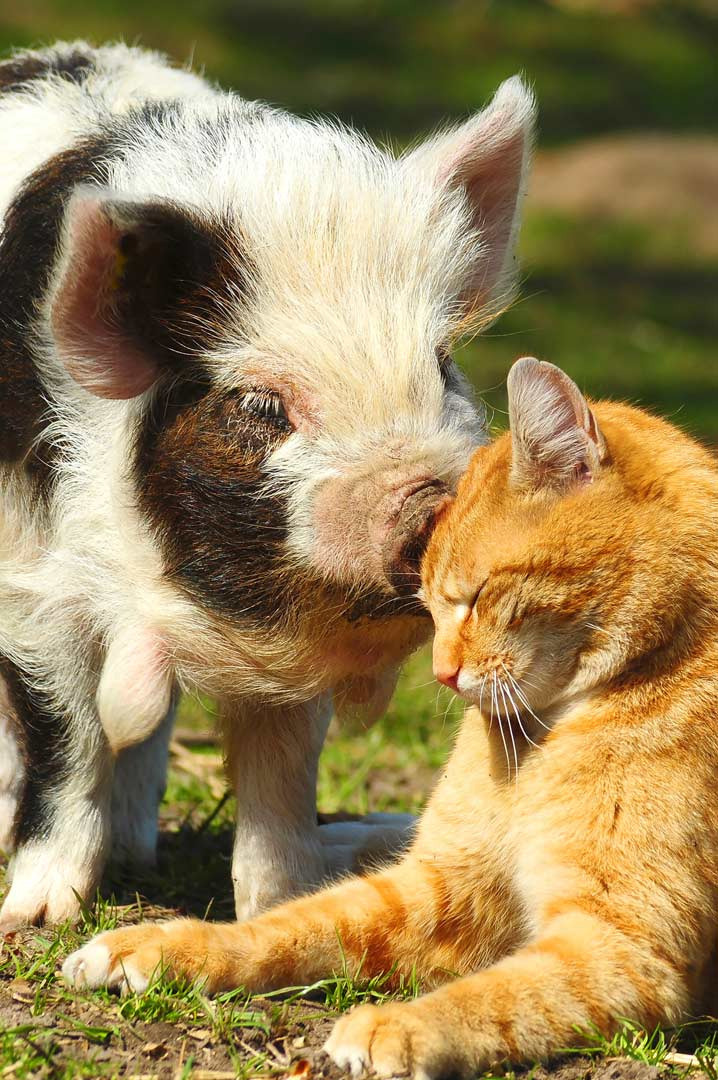

In [2]:
# Pick a random image
image_path = np.random.choice([os.path.join("images",a) for a in os.listdir("images")])
display(Image(image_path))

In [3]:
# Inception V3 model
inception_model = tf.keras.applications.InceptionV3(weights="imagenet", classifier_activation=None)

In [4]:
def predict_classes(image_path, top=10):
    """
    Print predicted clases for a given image.
    
    """
    
    # Load and process the input image
    image = tf.keras.preprocessing.image.load_img(image_path)
    image_arr = tf.keras.preprocessing.image.img_to_array(image)
    reshape_image = tf.image.resize(image_arr, size=(299,299), method='bilinear')
    input_inception = tf.keras.applications.inception_v3.preprocess_input(np.array([reshape_image]))
    
    # Make model predictions
    predictions = inception_model.predict(input_inception)
    
    # Print predictions
    for idx, pred in enumerate(tf.keras.applications.inception_v3.decode_predictions(predictions, top=top)[0]):
        print("{}. Prediction: {} - Score: {}".format(idx + 1,
                                                      pred[1].replace("_"," ").title(), 
                                                      np.round(float(pred[2]),decimals=5)))

In [5]:
predict_classes(image_path)

1. Prediction: Tabby - Score: 5.87692
2. Prediction: Hog - Score: 5.64996
3. Prediction: Tiger Cat - Score: 5.42621
4. Prediction: Guinea Pig - Score: 4.73956
5. Prediction: Persian Cat - Score: 4.12303
6. Prediction: Egyptian Cat - Score: 3.92758
7. Prediction: Siamese Cat - Score: 3.6423
8. Prediction: Tiger - Score: 3.16949
9. Prediction: Collie - Score: 3.10152
10. Prediction: Wild Boar - Score: 3.09795


# Sources

https://arxiv.org/pdf/1903.09190.pdf